In [1]:
import pandas as pd
import scanpy as sc

In [2]:
import numpy as np

from scipy import sparse

In [3]:
from anndata import AnnData

In [ ]:
adata = sc.read('GSE161824_A549_KRAS.rawcounts.matrix.mtx')

Only considering the two last: ['.matrix', '.mtx'].
Only considering the two last: ['.matrix', '.mtx'].


In [ ]:
adata.var

In [22]:
obs_names = pd.read_csv('GSE161824_A549_KRAS.rawcounts.cells.csv.gz', header = None,  compression = 'gzip')
var_names = pd.read_csv('GSE161824_A549_KRAS.rawcounts.genes.csv.gz', header = None, compression = 'gzip')

In [23]:
obs_names[0].unique().shape, obs_names.shape

((150044,), (150044, 1))

In [24]:
obs_names[obs_names[0] == 'GGAACTTGTAGCTTGT']

,0


In [25]:
adata.shape, obs_names.shape, var_names.shape

((150044, 24491), (150044, 1), (24491, 1))

In [26]:
adata.obs = obs_names
adata.var = var_names

In [27]:
adata.var[0].unique().shape, adata.shape, adata.obs[0].unique().shape

((24491,), (150044, 24491), (150044,))

In [ ]:
adata_tp53 = sc.read('GSE161824_A549_TP53.rawcounts.matrix.mtx')

Only considering the two last: ['.matrix', '.mtx'].
Only considering the two last: ['.matrix', '.mtx'].


In [9]:
adata_tp53.shape

(162314, 24868)

In [10]:
obs_names_tp53 = pd.read_csv('GSE161824_A549_TP53.rawcounts.cells.csv.gz', header = None,  compression = 'gzip')
var_names_tp53 = pd.read_csv('GSE161824_A549_TP53.rawcounts.genes.csv.gz', header = None, compression = 'gzip')

In [11]:
obs_names_tp53.shape, var_names_tp53.shape

((162314, 1), (24868, 1))

In [12]:
adata_tp53.obs = obs_names_tp53
adata_tp53.var = var_names_tp53

In [13]:
obs_names_tp53.head()

,0
0,AAACCTGAGAATGTTG-1-0
1,AAACCTGAGCTAGCCC-1-0
2,AAACCTGAGGTCGGAT-1-0
3,AAACCTGAGGTGCAAC-1-0
4,AAACCTGAGTCCGTAT-1-0


In [14]:
len(set(list(obs_names_tp53[0])) & set(list(obs_names[0])))

1023

In [15]:
len(set(list(var_names_tp53[0])) & set(list(var_names[0])))

23984

In [16]:
list_common_cells = list(set(list(obs_names_tp53[0])) & set(list(obs_names[0])))
list_common_genes = list(set(list(var_names_tp53[0])) & set(list(var_names[0])))

In [17]:

variant = pd.read_csv('GSE161824_A549_KRAS.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant.head()


,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,L159S,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,cell
0,0,25694.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAACGCACC-1-0
1,0,34868.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T50T,T50T,AAACCTGCAATGGTCT-1-0
2,0,25170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAGGACGTA-1-0
3,0,31500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAGTAAGAT-1-0
4,0,22654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T127T,T127T,AAACGGGAGACAGAGA-1-0


In [19]:
variant[variant['cell'] == 'GGAACTTGTAGCTTGT']

,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,L159S,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,cell


In [18]:

variant_tp53 = pd.read_csv('GSE161824_A549_TP53.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant_tp53.head()

,batch,n_counts,P152L,G245C,G245S,WT,C141Y,P222P,H214R,R337C,...,P47P,G266R,V157F,G245V,C238Y,S241C,V272M,variant,variant.detailed_multi,cell
0,0,31030.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G266E,G266E,AAACCTGAGAATGTTG-1-0
1,0,17061.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G105C,G105C,AAACCTGAGCTAGCCC-1-0
2,0,31724.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G105C,G105C,AAACCTGAGGTCGGAT-1-0
3,0,41329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,P47P,P47P,AAACCTGAGGTGCAAC-1-0
4,0,20702.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G360V,G360V,AAACCTGAGTCCGTAT-1-0


In [19]:
len(set(list(obs_names_tp53[0])) & set(list(variant_tp53['cell']))), variant_tp53.shape, obs_names_tp53.shape

(162314, (162314, 104), (162314, 1))

In [20]:
len(set(list(obs_names[0])) & set(list(variant['cell']))), variant.shape, obs_names.shape

(150044, (150044, 103), (150044, 1))

In [21]:
adata.obs.head()

,0
0,AAACCTGCAACGCACC-1-0
1,AAACCTGCAATGGTCT-1-0
2,AAACCTGCAGGACGTA-1-0
3,AAACCTGCAGTAAGAT-1-0
4,AAACGGGAGACAGAGA-1-0


In [22]:
len(list_common_genes)

23984

In [23]:
cell_kras = np.array(list(obs_names[0]))
cell_tp53 = np.array(list(obs_names_tp53[0]))

In [24]:
cell_kras_common = [np.where(cell_kras == i)[0][0] for i in list_common_cells]
cell_tp53_common = [np.where(cell_tp53 == i)[0][0] for i in list_common_cells]

In [25]:
adata_kras_common = adata[cell_kras_common]
adata_tp53_common = adata_tp53[cell_tp53_common]

In [26]:
gene_kras = np.array(list(var_names[0]))
gene_tp53 = np.array(list(var_names_tp53[0]))

gene_kras_common = [np.where(gene_kras == i)[0][0] for i in list_common_genes]
gene_tp53_common = [np.where(gene_tp53 == i)[0][0] for i in list_common_genes]

In [27]:
common_cell_diff = adata_kras_common.X.A[:, gene_kras_common] - adata_tp53_common.X.A[:, gene_tp53_common]

In [28]:
np.min(common_cell_diff), np.max(common_cell_diff)

(-2753.0, 3837.0)

In [29]:
obs_names_kras_proc = pd.read_csv('GSE161824_A549_KRAS.processed.cells.csv.gz', header = None,  compression = 'gzip')
obs_names_tp53_proc = pd.read_csv('GSE161824_A549_TP53.processed.cells.csv.gz', header = None,  compression = 'gzip')

In [30]:
obs_names_kras_proc.shape, cell_kras.shape, obs_names_tp53_proc.shape, cell_tp53.shape

((90262, 1), (150044,), (85778, 1), (162314,))

In [31]:
list_common_cells = list(set(list(obs_names_tp53[0])) & set(list(obs_names[0])))

In [32]:
list_common_cells_proc = list(set(list(obs_names_kras_proc[0])) & set(list(obs_names_tp53_proc[0])))

In [33]:
len(list_common_cells_proc)

326

In [34]:
# select cells in the processed data
obs_names_kras_common_proc = list(set(list(obs_names_kras_proc[0])) & set(list(obs_names[0])))
obs_names_tp53_common_proc = list(set(list(obs_names_tp53_proc[0])) & set(list(obs_names_tp53[0])))

In [35]:
len(obs_names_kras_common_proc), len(obs_names_kras_proc), len(obs_names_tp53_common_proc), len(obs_names_tp53_proc)

(90262, 90262, 85778, 85778)

In [36]:
cell_kras_proc_idx = [np.where(cell_kras == i)[0][0] for i in obs_names_kras_common_proc]
cell_tp53_proc_idx = [np.where(cell_tp53 == i)[0][0] for i in obs_names_tp53_common_proc]

In [56]:
adata_kras_proc = adata[cell_kras_proc_idx]
adata_tp53_proc = adata_tp53[cell_tp53_proc_idx]

In [57]:
adata_kras_proc.shape, adata_tp53_proc.shape

((90262, 24491), (85778, 24868))

In [58]:
def index_genes(adata, indices_gene):
    ######
    obs = adata.obs
    var = adata.var
    if sparse.issparse(adata.X):
        X_data = adata.X.A
    else:
        X_data = adata.X
    X_data = X_data[:, indices_gene]
    var = var.iloc[indices_gene, :]
    return AnnData(X = X_data, var = var, obs = obs)

In [59]:
adata_kras_proc.shape

(90262, 24491)

In [60]:
adata_kras_proc = index_genes(adata_kras_proc, gene_kras_common)
adata_kras_proc.shape

/home/hengshi/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(90262, 23984)

In [61]:
adata_tp53_proc.shape

(85778, 24868)

In [62]:

adata_tp53_proc = index_genes(adata_tp53_proc, gene_tp53_common)
adata_tp53_proc.shape




(85778, 23984)

In [41]:
variant_kras = pd.read_csv('GSE161824_A549_KRAS.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant_tp53 = pd.read_csv('GSE161824_A549_TP53.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant_tp53.head()

var_kras_cell = np.array(list(variant_kras['cell']))
var_tp53_cell = np.array(list(variant_tp53['cell']))


variant_kras_proc_idx = [np.where(var_kras_cell == i)[0][0] for i in obs_names_kras_common_proc]
variant_tp53_proc_idx = [np.where(var_tp53_cell == i)[0][0] for i in obs_names_tp53_common_proc]

var_kras = variant_kras.iloc[variant_kras_proc_idx, :]
var_tp53 = variant_tp53.iloc[variant_tp53_proc_idx, :]
var_kras.shape, var_tp53.shape, len(variant_kras_proc_idx), len(variant_tp53_proc_idx)

[5015,
 5328,
 3302,
 6885,
 24272,
 15335,
 12024,
 9611,
 1908,
 15888,
 15,
 23160,
 1655,
 13661,
 8549,
 17258,
 2128,
 22293,
 23351,
 13555,
 10676,
 19844,
 4520,
 7309,
 9401,
 10322,
 2341,
 14993,
 6882,
 15704,
 2547,
 17679,
 4634,
 2200,
 8080,
 7028,
 23999,
 17413,
 5436,
 3378,
 3884,
 22740,
 15959,
 18427,
 3190,
 10953,
 11733,
 19310,
 5717,
 10766,
 4473,
 18790,
 7351,
 9541,
 5785,
 24114,
 20983,
 1049,
 543,
 3896,
 12200,
 19384,
 15030,
 23185,
 3151,
 16657,
 3053,
 3904,
 7383,
 4587,
 815,
 19709,
 22041,
 3625,
 19296,
 19737,
 4113,
 8542,
 9158,
 24150,
 6893,
 10496,
 21138,
 21124,
 19596,
 15464,
 4413,
 11260,
 3785,
 16787,
 16464,
 6750,
 7649,
 8815,
 11883,
 15729,
 20132,
 19927,
 23436,
 3231,
 14477,
 18026,
 23831,
 10943,
 9084,
 9127,
 13495,
 16693,
 17838,
 9708,
 913,
 9609,
 18633,
 23761,
 3626,
 22710,
 18237,
 2891,
 714,
 15604,
 14204,
 2793,
 4397,
 8209,
 8390,
 19766,
 5959,
 1774,
 10350,
 23733,
 19386,
 10958,
 8853,
 6703,

In [83]:
adata_kras_proc.shape

(90262, 23984)

In [129]:
 obs_names[0]

0          AAACCTGCAACGCACC-1-0
1          AAACCTGCAATGGTCT-1-0
2          AAACCTGCAGGACGTA-1-0
3          AAACCTGCAGTAAGAT-1-0
4          AAACGGGAGACAGAGA-1-0
                  ...          
150039    TTTGTCAAGAGGGCTT-1-31
150040    TTTGTCAAGGGATACC-1-31
150041    TTTGTCACACATGACT-1-31
150042    TTTGTCACAGAAGCAC-1-31
150043    TTTGTCATCCGAATGT-1-31
Name: 0, Length: 150044, dtype: object

In [130]:
obs_name_kras = adata_kras_proc.obs
obs_name_kras_list = np.array(list(obs_name_kras[0]))


obs_name_tp53 = adata_tp53_proc.obs
obs_name_tp53_list = np.array(list(obs_name_tp53[0]))


common_kras_proc_idx = [np.where(obs_name_kras_list == i)[0][0] for i in list_common_cells_proc]
common_tp53_proc_idx = [np.where(obs_name_tp53_list == i)[0][0] for i in list_common_cells_proc]

In [131]:
len(common_kras_proc_idx), len(common_tp53_proc_idx)

(326, 326)

In [132]:
obs_name_kras_copy = obs_name_kras.copy()
obs_name_tp53_copy = obs_name_tp53.copy()

In [136]:
obs_name_kras_list[common_kras_proc_idx] = np.array(['KRAS_' + i for i in obs_name_kras_list[common_kras_proc_idx]])

In [138]:
obs_name_kras_copy[0] = obs_name_kras_list

In [141]:
obs_name_tp53_list[common_tp53_proc_idx] = np.array(['TP53_' + i for i in obs_name_tp53_list[common_tp53_proc_idx]])
obs_name_tp53_copy[0] = obs_name_tp53_list
obs_name_tp53_copy.iloc[common_tp53_proc_idx, :]

,0
15294,TP53_TTAGTTCTCTGCCCTA
116272,TP53_AGATCTGAGAGTACAT
105512,TP53_TTTATGCGTTTGACAC
89795,TP53_TGCGCAGTCCCATTTA
149646,TP53_GGACGTCAGATCTGCT
...,...
55863,TP53_AACACGTTCCTCTAGC
71246,TP53_ATGCGATAGCTAGGCA
132864,TP53_CCGTACTGTCTAGCGC
23678,TP53_GCGGGTTCATGTTCCC


In [142]:
adata_kras_proc.obs = obs_name_kras_copy
adata_tp53_proc.obs = obs_name_tp53_copy

In [181]:
adata_kras_proc.var.index = adata_kras_proc.var[0]
adata_tp53_proc.var.index = adata_tp53_proc.var[0]

In [193]:
adata_kras_proc.var.index.name = 'gene_name'
adata_tp53_proc.var.index.name = 'gene_name'

In [194]:
adata_kras_proc.var.columns = ['gene_names']
adata_tp53_proc.var.columns = ['gene_names']

In [108]:
adata_kras_proc

NameError: name 'adata_kras_proc' is not defined

In [195]:
adata_combine = adata_kras_proc.concatenate(adata_tp53_proc)

In [196]:
adata_combine.var.head()

,gene_names
gene_name,
RP11-651P23.5,RP11-651P23.5
MFI2-AS1,MFI2-AS1
SAP130,SAP130
RAD50,RAD50
IL10RB,IL10RB


In [197]:
adata_kras_proc.shape[0] + adata_tp53_proc.shape[0]

176040

In [198]:
adata_kras_proc.var.head()

,gene_names
gene_name,
RP11-651P23.5,RP11-651P23.5
MFI2-AS1,MFI2-AS1
SAP130,SAP130
RAD50,RAD50
IL10RB,IL10RB


In [199]:
adata_tp53_proc.var.head()

,gene_names
gene_name,
RP11-651P23.5,RP11-651P23.5
MFI2-AS1,MFI2-AS1
SAP130,SAP130
RAD50,RAD50
IL10RB,IL10RB


In [200]:
adata_combine.var.head()

,gene_names
gene_name,
RP11-651P23.5,RP11-651P23.5
MFI2-AS1,MFI2-AS1
SAP130,SAP130
RAD50,RAD50
IL10RB,IL10RB


In [201]:
adata_combine.shape

(176040, 23984)

In [202]:
adata_combine.var_names_make_unique()
adata_combine.shape

(176040, 23984)

In [203]:
sc.settings.verbosity = 3
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 7.2.0
attr                19.3.0
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                2.10.0
idna                2.10
ipykernel           5.3.2
ipython_

In [204]:
adata_combine.shape

(176040, 23984)

normalizing counts per cell
    finished (0:01:23)


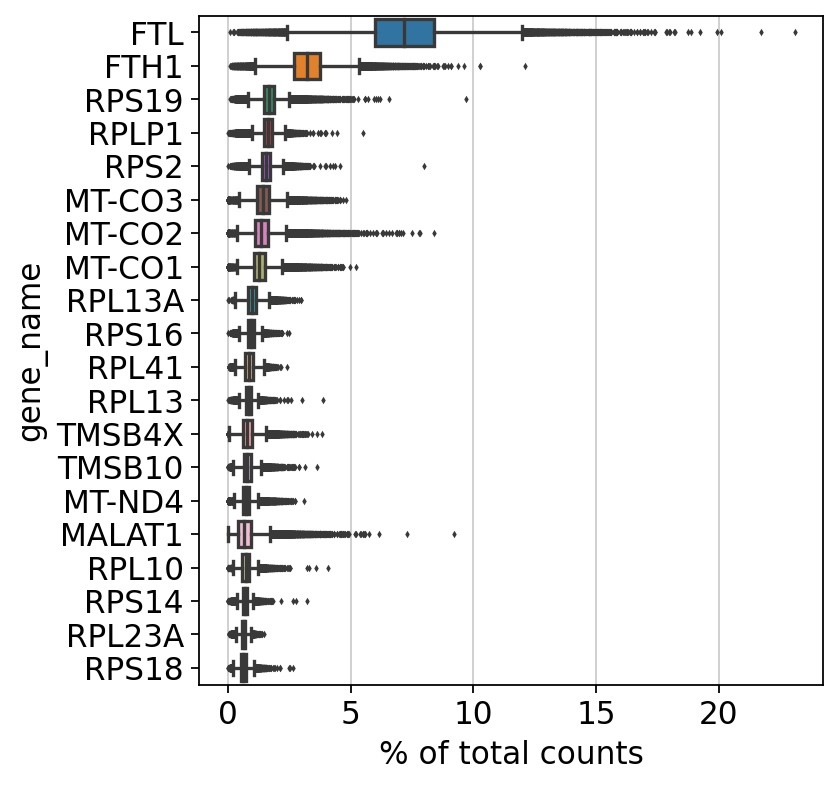

In [205]:
sc.settings.set_figure_params(dpi=80)
sc.pl.highest_expr_genes(adata_combine, n_top = 20)

In [206]:
sc.pp.filter_cells(adata_combine, min_genes = 200)
sc.pp.filter_genes(adata_combine, min_cells = 3)

filtered out 86 genes that are detected in less than 3 cells


In [207]:
adata_combine.shape

(176040, 23898)

In [208]:
x_data =adata_combine.X
x_data= np.matrix(x_data)

In [209]:
mito_genes = adata_combine.var_names.str.startswith('MT-')

adata_combine.obs['percent_mito'] = np.sum(
    x_data[:, mito_genes], axis=1).A1 / np.sum(x_data, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata_combine.obs['n_counts'] = x_data.sum(axis=1).A1

... storing 0 as categorical


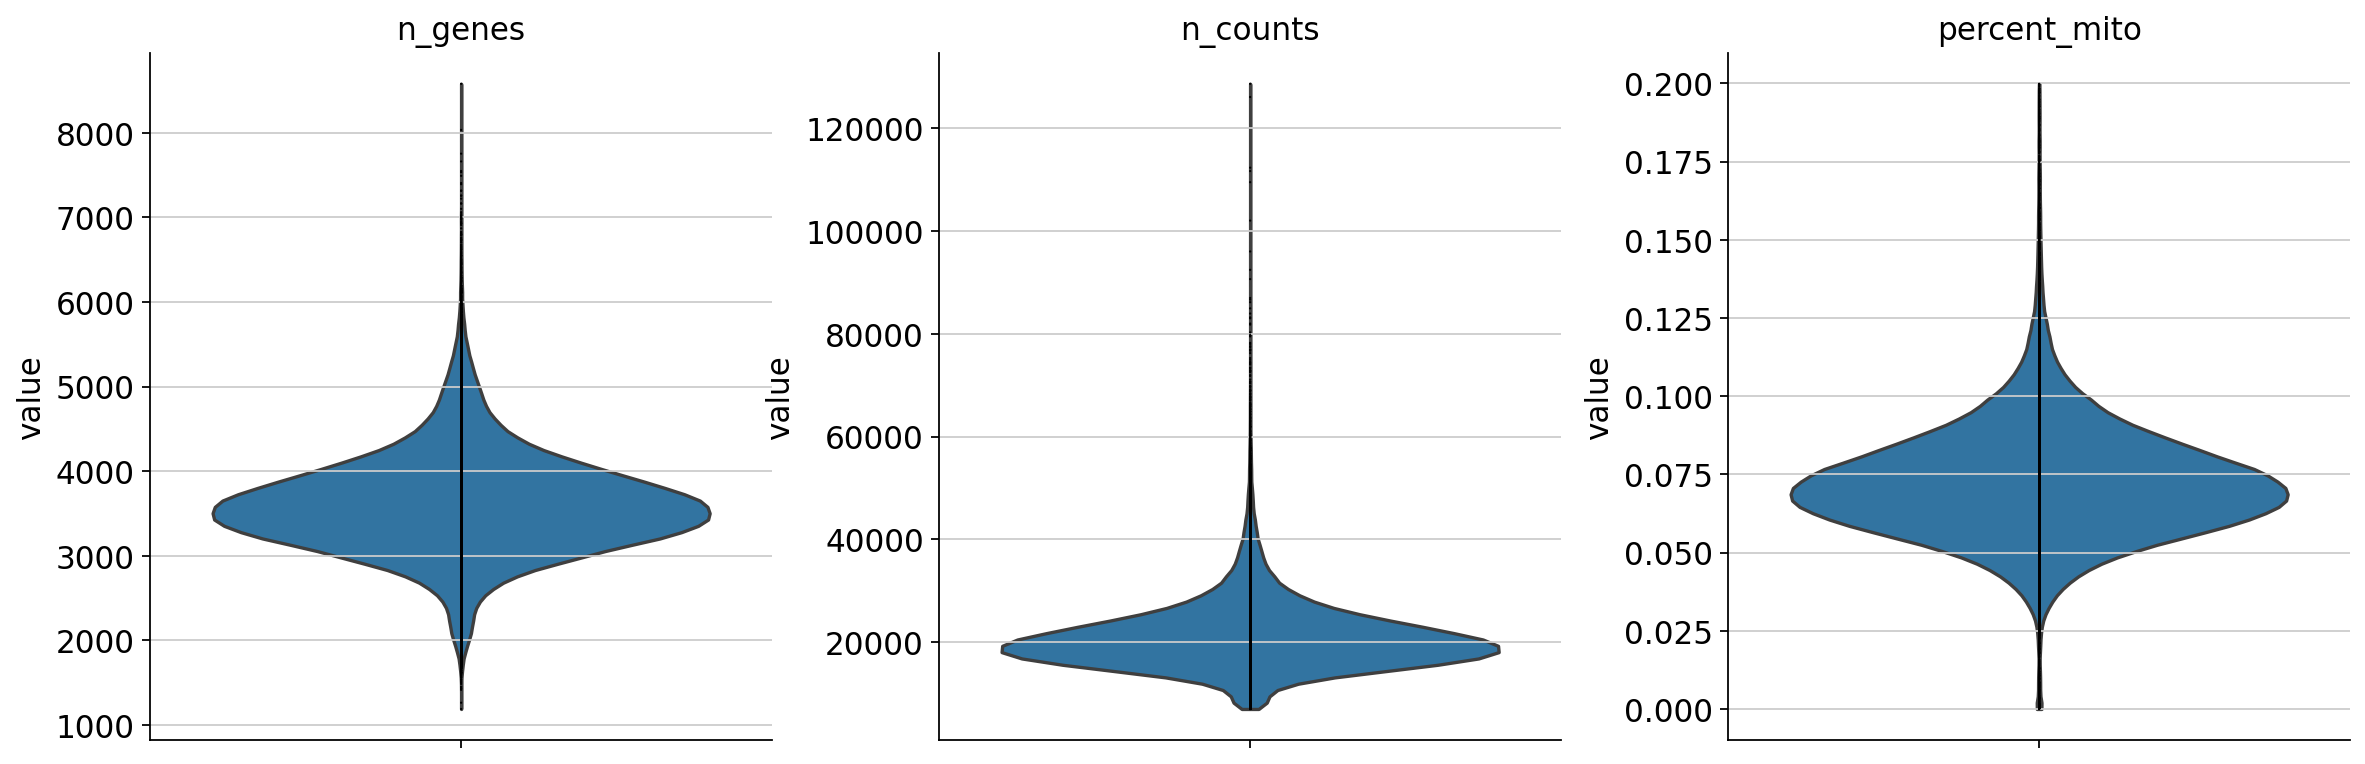

In [210]:
sc.pl.violin(adata_combine, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0, multi_panel=True)

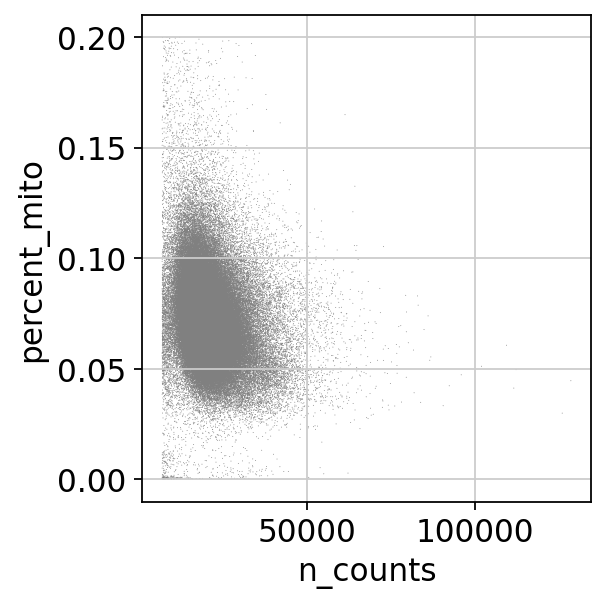

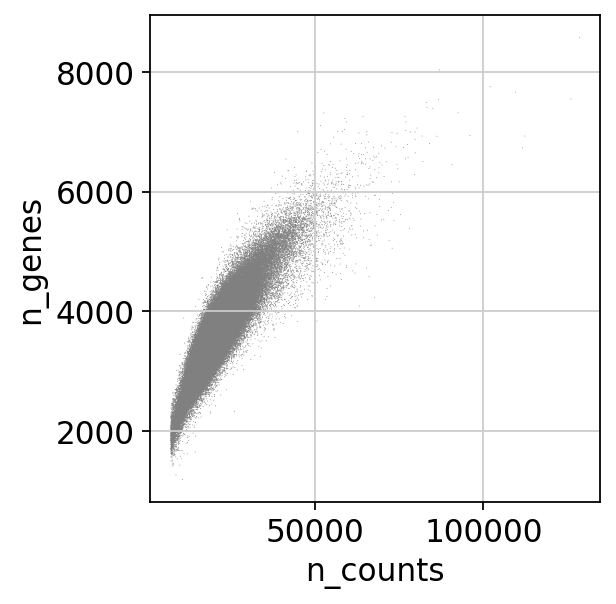

In [211]:
sc.pl.scatter(adata_combine, x='n_counts', y='percent_mito')
sc.pl.scatter(adata_combine, x='n_counts', y='n_genes')

In [212]:
(adata_combine.obs['n_genes'] < 6000).sum(), (adata_combine.obs['percent_mito'] < 0.1).sum()

(175773, 165179)

In [213]:
x_data.sum(1)[:10]

matrix([[15047.],
        [25642.],
        [18119.],
        [21311.],
        [17166.],
        [28035.],
        [20335.],
        [25979.],
        [27056.],
        [29002.]], dtype=float32)

In [214]:
adata_combine.var.head()

,gene_names,n_cells
gene_name,,
RP11-651P23.5,RP11-651P23.5,69
MFI2-AS1,MFI2-AS1,15956
SAP130,SAP130,15818
RAD50,RAD50,106592
IL10RB,IL10RB,33884


In [215]:
adata_combine = adata_combine[adata_combine.obs['percent_mito'] < 0.1, :]
adata_combine = adata_combine[adata_combine.obs['n_genes'] < 6000, :]


In [216]:
adata_combineCount = adata_combine.copy()


In [217]:
adata_combineCount.obs.head()

,0,batch,n_genes,percent_mito,n_counts
100430-0,TATCAGGGTAAGGGAA-1-21,0,2816,0.054297,15047.0
66847-0,GGGCACTAGAGGGCTT-1-14,0,3817,0.083028,25642.0
124665-0,TGCTACCGTTAGGGTG-1-26,0,3373,0.072300,18119.0
36093-0,TTCTCCTCAAAGGCGT-1-7,0,3520,0.058233,21311.0
107267-0,CCCAATCCAGTATAAG-1-23,0,3176,0.082955,17166.0


In [219]:
adata_combineCount.var.head()

,gene_names,n_cells
gene_name,,
RP11-651P23.5,RP11-651P23.5,69
MFI2-AS1,MFI2-AS1,15956
SAP130,SAP130,15818
RAD50,RAD50,106592
IL10RB,IL10RB,33884


In [220]:
adata_combineCount.obs.columns

Index([0, 'batch', 'n_genes', 'percent_mito', 'n_counts'], dtype='object')

In [221]:
adata_combineCount.obs.index = adata_combineCount.obs[0]
adata_combineCount.obs.index.name = 'cell_name'
adata_combineCount.obs.columns = ['cell_name', 'batch', 'n_genes', 'percent_mito', 'n_counts']

In [222]:
adata_combineCount.obs.head()

,cell_name,batch,n_genes,percent_mito,n_counts
cell_name,,,,,
TATCAGGGTAAGGGAA-1-21,TATCAGGGTAAGGGAA-1-21,0,2816,0.054297,15047.0
GGGCACTAGAGGGCTT-1-14,GGGCACTAGAGGGCTT-1-14,0,3817,0.083028,25642.0
TGCTACCGTTAGGGTG-1-26,TGCTACCGTTAGGGTG-1-26,0,3373,0.072300,18119.0
TTCTCCTCAAAGGCGT-1-7,TTCTCCTCAAAGGCGT-1-7,0,3520,0.058233,21311.0
CCCAATCCAGTATAAG-1-23,CCCAATCCAGTATAAG-1-23,0,3176,0.082955,17166.0


In [223]:
adata_combineCount.shape

(164931, 23898)

In [226]:
adata_combineCount.obs.index.name = 'cell_id'

In [228]:
adata_combineCount.var.index.name = 'gene_id'

In [229]:
adata_combineCount.var_names_make_unique()

In [233]:
adata_combineCount.obs['cell_name'] = list(adata_combineCount.obs['cell_name'])

In [236]:
adata_combineCount.obs.index = list(adata_combineCount.obs.index)

In [237]:
adata_combineCount.obs_names_make_unique()

In [238]:
adata_combineCount.write('Combine_raw_BeforeNormalize.h5ad')

... storing 'cell_name' as categorical


In [239]:
adata_combine = adata_combineCount.copy()

##  select hightly-variable genes

In [4]:
import scanpy as sc
adata_combine = sc.read('Combine_raw_BeforeNormalize.h5ad')

In [21]:
adata_combine = sc.read('Combine_raw_BeforeNormalize.h5ad')
obs_data = adata_combine.obs
obs_data[obs_data['cell_name'] == 'KRAS_GGAACTTGTAGCTTGT']

,cell_name,batch,n_genes,percent_mito,n_counts
KRAS_GGAACTTGTAGCTTGT,KRAS_GGAACTTGTAGCTTGT,0,4505,0.087710,27454.0
KRAS_GGAACTTGTAGCTTGT-1,KRAS_GGAACTTGTAGCTTGT,0,2984,0.041386,16479.0


In [5]:
sc.pp.normalize_per_cell(adata_combine, counts_per_cell_after=1e6)
sc.pp.log1p(adata_combine)
adata_combine.raw = adata_combine

In [6]:
sc.pp.highly_variable_genes(adata_combine, min_mean=0.0125, max_mean=5, min_disp=0.5)


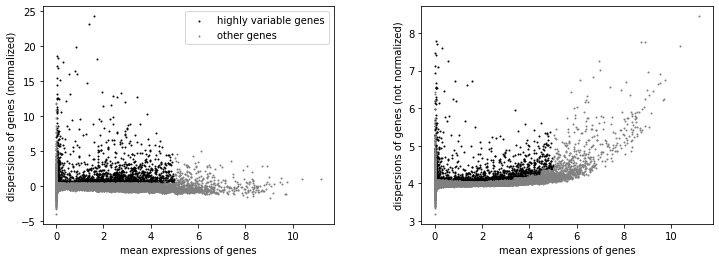

In [7]:
sc.pl.highly_variable_genes(adata_combine)

In [8]:
adata_combine.var.head()

,gene_names,n_cells,highly_variable,means,dispersions,dispersions_norm
gene_id,,,,,,
RP11-651P23.5,RP11-651P23.5,69,False,0.018960,4.009131,0.107912
MFI2-AS1,MFI2-AS1,15956,False,1.742992,3.992540,-0.028460
SAP130,SAP130,15818,False,1.698869,3.965450,-0.356301
RAD50,RAD50,106592,False,3.961958,4.150246,0.125940
IL10RB,IL10RB,33884,False,2.434160,3.977401,-0.330815


In [9]:
highvar_gene = np.where(adata_combine.var['highly_variable'])[0]

In [10]:
highvar_gene

array([   10,    20,    28, ..., 23826, 23841, 23846])

In [11]:
adata_combine = sc.read('Combine_raw_BeforeNormalize.h5ad')

In [13]:
adata_combine.layers["counts"] = adata_combine.X.copy()

In [14]:
adata_combine = adata_combine[:, highvar_gene]

In [15]:
adata_combine.layers[
    'counts'
].shape

(164931, 1629)

In [16]:
adata_combine.shape

(164931, 1629)

In [17]:
sc.pp.normalize_total(adata_combine, target_sum = 1e4)
sc.pp.log1p(adata_combine)
adata_combine.raw = adata_combine

/home/hengshi/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.highly_variable_genes(adata_combine, min_mean=0.0125, max_mean=3, min_disp=0.5)

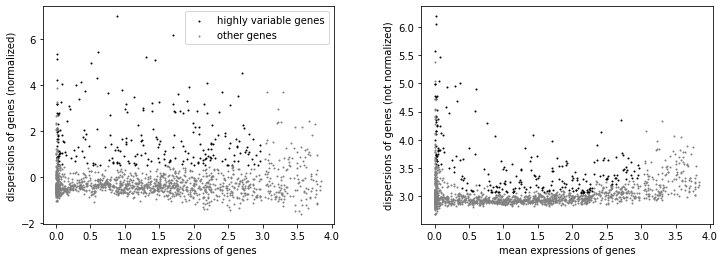

In [19]:
sc.pl.highly_variable_genes(adata_combine)

In [20]:
adata_combine.var.highly_variable.sum()

239

In [21]:
sc.pp.scale(adata_combine, max_value=10)

In [22]:
adata_combine.write('Combine_processed_NormBYHighGenes_processed.h5ad')

In [20]:
adata_combine = sc.read('Combine_processed_NormBYHighGenes_processed.h5ad')
obs_data = adata_combine.obs
obs_data[obs_data['cell_name'] == 'KRAS_GGAACTTGTAGCTTGT']

,cell_name,batch,n_genes,percent_mito,n_counts
KRAS_GGAACTTGTAGCTTGT,KRAS_GGAACTTGTAGCTTGT,0,4505,0.087710,27454.0
KRAS_GGAACTTGTAGCTTGT-1,KRAS_GGAACTTGTAGCTTGT,0,2984,0.041386,16479.0


In [23]:
adata_combine.shape

(164931, 1629)

In [86]:
variant_kras = pd.read_csv('GSE161824_A549_KRAS.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant_tp53 = pd.read_csv('GSE161824_A549_TP53.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant_kras.head()

,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,L159S,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,cell
0,0,25694.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAACGCACC-1-0
1,0,34868.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T50T,T50T,AAACCTGCAATGGTCT-1-0
2,0,25170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAGGACGTA-1-0
3,0,31500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAGTAAGAT-1-0
4,0,22654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T127T,T127T,AAACGGGAGACAGAGA-1-0


In [87]:
vari_kras_cell = np.array(list(variant_kras['cell']))
vari_tp53_cell = np.array(list(variant_tp53['cell']))


In [91]:
set_all_common = set(list((set(vari_kras_cell) & set(vari_tp53_cell))))

In [95]:

obs_names_kras_proc = pd.read_csv('GSE161824_A549_KRAS.processed.cells.csv.gz', header = None,  compression = 'gzip')
obs_names_tp53_proc = pd.read_csv('GSE161824_A549_TP53.processed.cells.csv.gz', header = None,  compression = 'gzip')

list_common_cells_proc = list(set(list(obs_names_kras_proc[0])) & set(list(obs_names_tp53_proc[0])))

common_kras_proc_idx = [np.where(vari_kras_cell == i)[0][0] for i in list_common_cells_proc]
common_tp53_proc_idx = [np.where(vari_tp53_cell == i)[0][0] for i in list_common_cells_proc]



In [96]:

vari_kras_cell[common_kras_proc_idx] = np.array(['KRAS_' + i for i in vari_kras_cell[common_kras_proc_idx]])
variant_kras['cell'] = vari_kras_cell

In [97]:
vari_tp53_cell[common_tp53_proc_idx] = np.array(['TP53_' + i for i in vari_tp53_cell[common_tp53_proc_idx]])
variant_tp53['cell'] = vari_tp53_cell

In [98]:
len(list((set(variant_kras['cell']) & set(variant_tp53['cell']))))

697

In [100]:
len(set_all_common) - len(list_common_cells_proc)

697

In [101]:
variant_kras.iloc[common_kras_proc_idx, :].head()

,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,L159S,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,cell
145139,30,26080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G12F,G12F,KRAS_TTTATGCTCGCTGATA
115391,25,20995.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,S136N,S136N,KRAS_AAACGGGAGCCACCTG
49327,10,18277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,K179R,K179R,KRAS_TGACGGCAGGGTGTGT
43393,9,23843.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V14I,V14I,KRAS_GGAATAAAGTGCCAGA
121722,26,21128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,T144T,T144T,KRAS_CCGTGGATCAGAGGTG


In [102]:
variant_tp53.iloc[common_tp53_proc_idx, :].head()

,batch,n_counts,P152L,G245C,G245S,WT,C141Y,P222P,H214R,R337C,...,P47P,G266R,V157F,G245V,C238Y,S241C,V272M,variant,variant.detailed_multi,cell
157133,30,15419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H179R,H179R,TP53_TTTATGCTCGCTGATA
126185,25,15726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,G245V,G245V,TP53_AAACGGGAGCCACCTG
55271,10,16800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M237I,M237I,TP53_TGACGGCAGGGTGTGT
49583,9,13466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H193L,H193L,TP53_GGAATAAAGTGCCAGA
132875,26,17207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y163C,Y163C,TP53_CCGTGGATCAGAGGTG


In [103]:
obs_data = adata_combine.obs

In [106]:
obs_data['cell_name'][obs_data['cell_name'].duplicated()]

KRAS_GGAACTTGTAGCTTGT-1    KRAS_GGAACTTGTAGCTTGT
TP53_GGAACTTGTAGCTTGT-1    TP53_GGAACTTGTAGCTTGT
Name: cell_name, dtype: category
Categories (164929, object): [AAACCTGAGAAACCGC-1-6, AAACCTGAGAAACCGC-1-17, AAACCTGAGAATCTCC-1-7, AAACCTGAGAATGTGT-1-22, ..., TTTGTCATCTTGAGGT-1-15, TTTGTCATCTTGGGTA-1-17, TTTGTCATCTTGGGTA-1-20, TTTGTCATCTTTCCTC-1-4]

In [107]:
obs_data[obs_data['cell_name'] == 'KRAS_GGAACTTGTAGCTTGT']

,cell_name,batch,n_genes,percent_mito,n_counts
KRAS_GGAACTTGTAGCTTGT,KRAS_GGAACTTGTAGCTTGT,0,4505,0.087710,27454.0
KRAS_GGAACTTGTAGCTTGT-1,KRAS_GGAACTTGTAGCTTGT,0,2984,0.041386,16479.0


In [104]:
obs_data['cell_name'].unique().shape

((164929,), (164931, 5))

In [74]:
variant_kras['indice'] = list(range(variant_kras.shape[0]))
vardata_kras = obs_data.merge(variant_kras.loc[:, ['indice', 'cell']], left_on = 'cell_name', right_on = 'cell', how = 'left')

In [75]:
vardata_kras['cell'].isna().sum()

77792

In [76]:
vardata_kras.head()

,cell_name,batch,n_genes,percent_mito,n_counts,indice,cell
0,TATCAGGGTAAGGGAA-1-21,0,2816,0.054297,15047.0,100430.0,TATCAGGGTAAGGGAA-1-21
1,GGGCACTAGAGGGCTT-1-14,0,3817,0.083028,25642.0,66847.0,GGGCACTAGAGGGCTT-1-14
2,TGCTACCGTTAGGGTG-1-26,0,3373,0.072300,18119.0,124665.0,TGCTACCGTTAGGGTG-1-26
3,TTCTCCTCAAAGGCGT-1-7,0,3520,0.058233,21311.0,36093.0,TTCTCCTCAAAGGCGT-1-7
4,CCCAATCCAGTATAAG-1-23,0,3176,0.082955,17166.0,107267.0,CCCAATCCAGTATAAG-1-23


In [77]:
variant_tp53['indice'] = list(range(variant_tp53.shape[0]))
vardata_tp53 = obs_data.merge(variant_tp53.loc[:, ['indice', 'cell']], left_on = 'cell_name', right_on = 'cell', how = 'left')

In [79]:
vardata_tp53

,cell_name,batch,n_genes,percent_mito,n_counts,indice,cell
0,TATCAGGGTAAGGGAA-1-21,0,2816,0.054297,15047.0,NaN,NaN
1,GGGCACTAGAGGGCTT-1-14,0,3817,0.083028,25642.0,NaN,NaN
2,TGCTACCGTTAGGGTG-1-26,0,3373,0.072300,18119.0,NaN,NaN
3,TTCTCCTCAAAGGCGT-1-7,0,3520,0.058233,21311.0,NaN,NaN
4,CCCAATCCAGTATAAG-1-23,0,3176,0.082955,17166.0,NaN,NaN
...,...,...,...,...,...,...,...
164928,TP53_TTGCGTCAGTCGTACT,1,3099,0.051652,17347.0,65529.0,TP53_TTGCGTCAGTCGTACT
164929,TGCGCAGGTACGAAAT-1-2,1,3622,0.081318,24275.0,15067.0,TGCGCAGGTACGAAAT-1-2
164930,CATCAAGAGTAATCCC-1-28,1,3512,0.074871,18218.0,142628.0,CATCAAGAGTAATCCC-1-28
164931,AAGGCAGGTCGAGTTT-1-22,1,4069,0.054853,28403.0,110791.0,AAGGCAGGTCGAGTTT-1-22


In [83]:
vardata_tp53['cell'].isna().sum(), (-vardata_tp53['cell'].isna()).sum()

(86642, 78291)

In [84]:
vardata_kras['cell'].isna().sum(), (-vardata_kras['cell'].isna()).sum()

(77792, 87141)

In [85]:
vardata_tp53.shape

(164933, 7)

In [53]:
np.where(variant_tp53['cell'])[0][-1]

164932

In [61]:
np.where(vardata_kras['cell'])[0][-1]

164932

In [62]:
vardata_kras.shape

(164933, 7)

In [64]:
variant_tp53.shape

(164933, 7)